In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy
import sweetviz

plt.style.use('ggplot')


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('~/Desktop/datasets/udemy-eda-dataset.csv')

In [3]:
#df.head()
#df.info()
df.isna().sum()

mean radius                 87
mean texture                77
mean perimeter              56
mean area                  166
mean smoothness            185
mean compactness            89
mean concavity             130
mean concave points        187
mean symmetry               98
mean fractal dimension      65
radius error                94
texture error              135
perimeter error            188
area error                  75
smoothness error            77
compactness error          113
concavity error            190
concave points error        62
symmetry error              82
fractal dimension error    157
worst radius                94
worst texture              155
worst perimeter            109
worst area                  57
worst smoothness           101
worst compactness           95
worst concavity             62
worst concave points        74
worst symmetry             159
worst fractal dimension     99
target                       0
dtype: int64

In [4]:
df['area error'].value_counts(normalize=True)

area error
A    0.989879
B    0.008097
C    0.002024
Name: proportion, dtype: float64

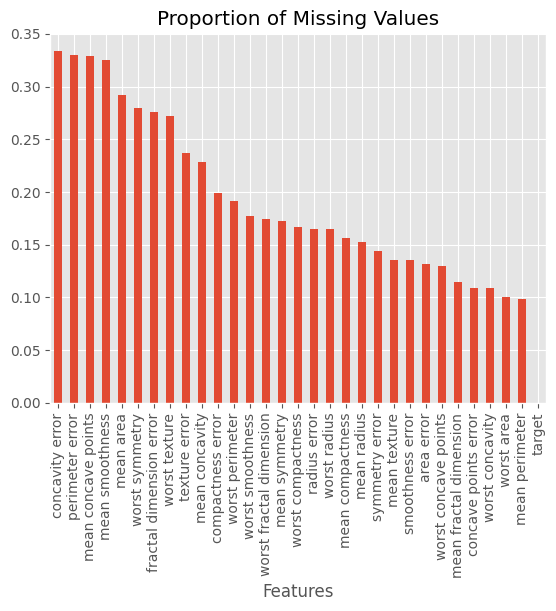

In [5]:
missing_rank=(df.isna().sum()/df.shape[0]).sort_values(ascending=False)
missing_rank_vis=missing_rank.plot(kind='bar', title='Proportion of Missing Values')
missing_rank_vis.set_xlabel('Features')
plt.show()

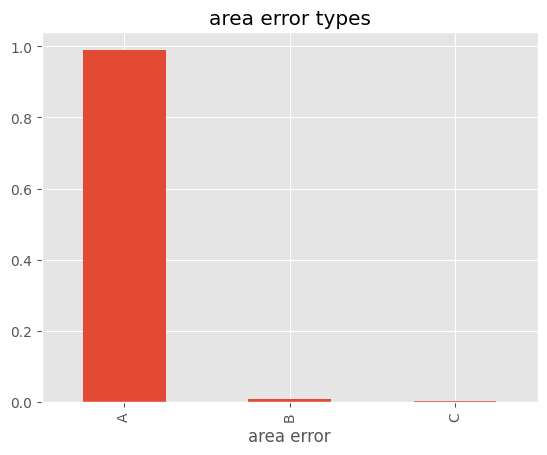

In [6]:
df['area error'].value_counts(normalize=True) \
.plot(kind='bar', title='area error types')

plt.show()

In [7]:
df.describe(percentiles=[0.25, 0.5])
df.describe(include=['object'])

,area error
count,494
unique,3
top,A
freq,489


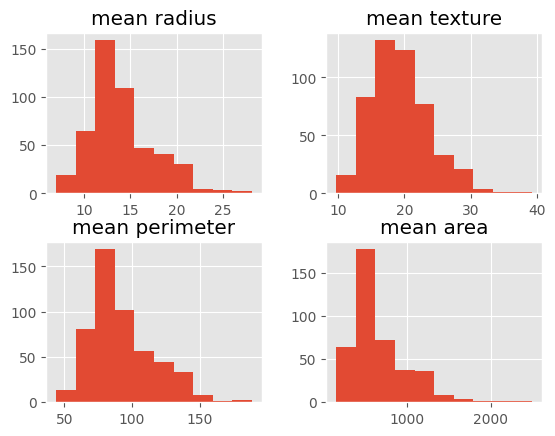

In [8]:
df.iloc[:, 0:4].hist()
plt.show()

<Axes: >

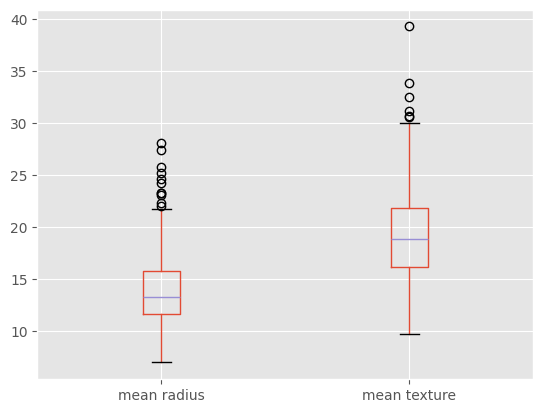

In [9]:
# boxplots 
#df[['mean radius']].boxplot()
df[['mean radius', 'mean texture']].boxplot()
#df['mean radius'].describe()

<Axes: >

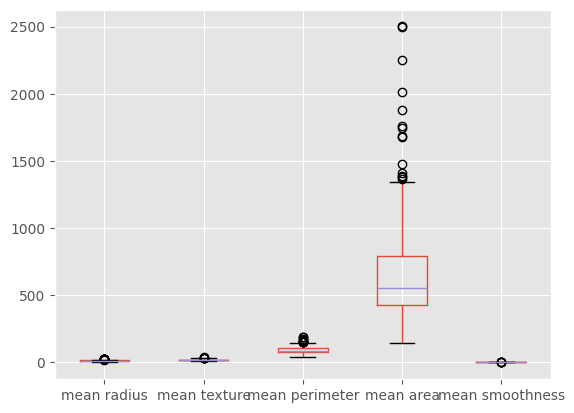

In [10]:
# take the first quartile, subtract by 1.5*IQR (3rd quartile-1st quartile)
# is the outer bound
# outside the bounds are outliers

df.iloc[:, 0:5].boxplot()

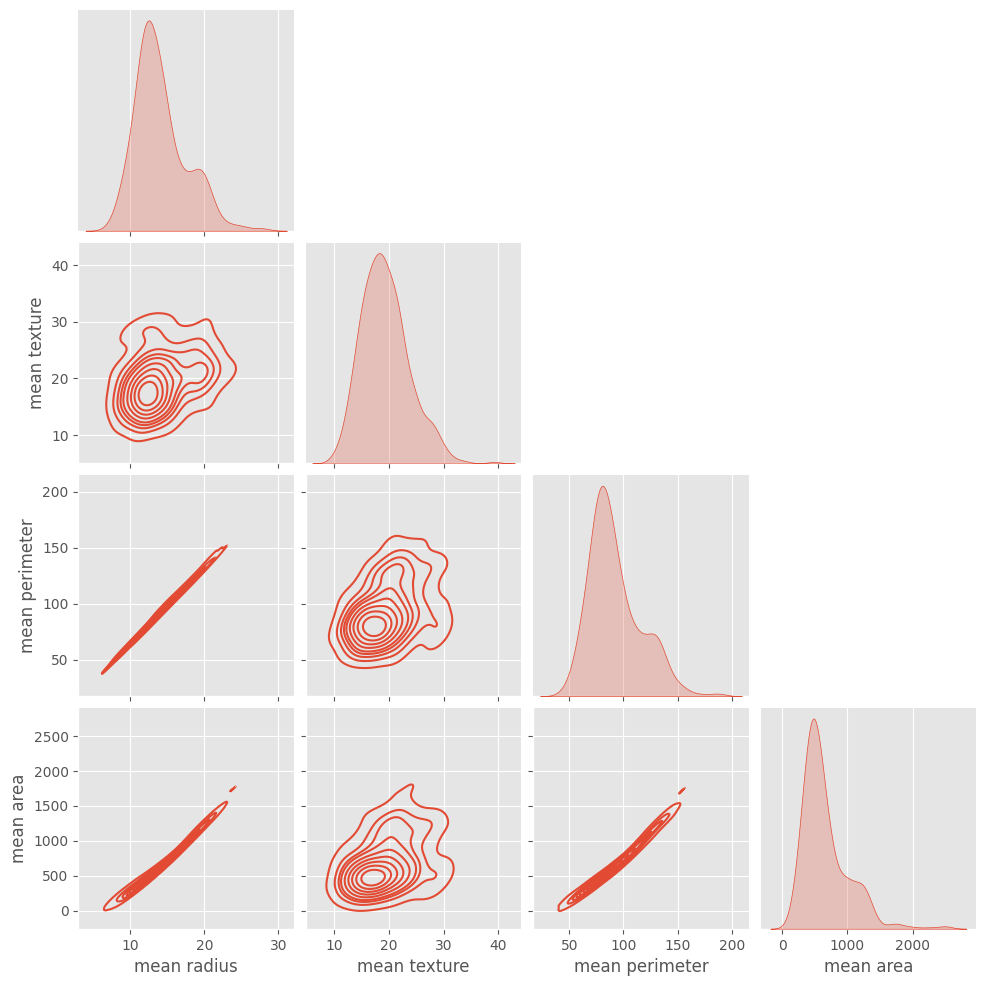

In [11]:
# pairplot
sns.pairplot(df.select_dtypes(include = 'number').iloc[:, 0:4], kind='kde', corner=True)

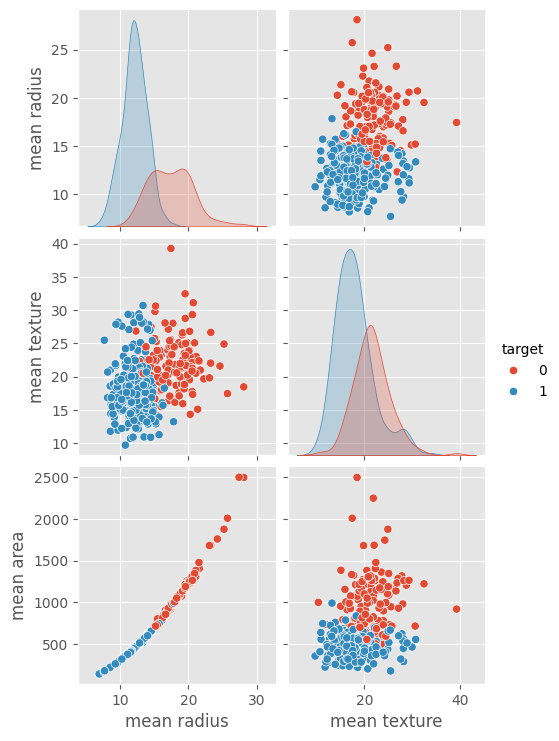

In [12]:
sns.pairplot(df, x_vars=['mean radius', 'mean texture'], 
             y_vars= ['mean radius', 'mean texture', 'mean area'], 
             hue='target')

<Axes: >

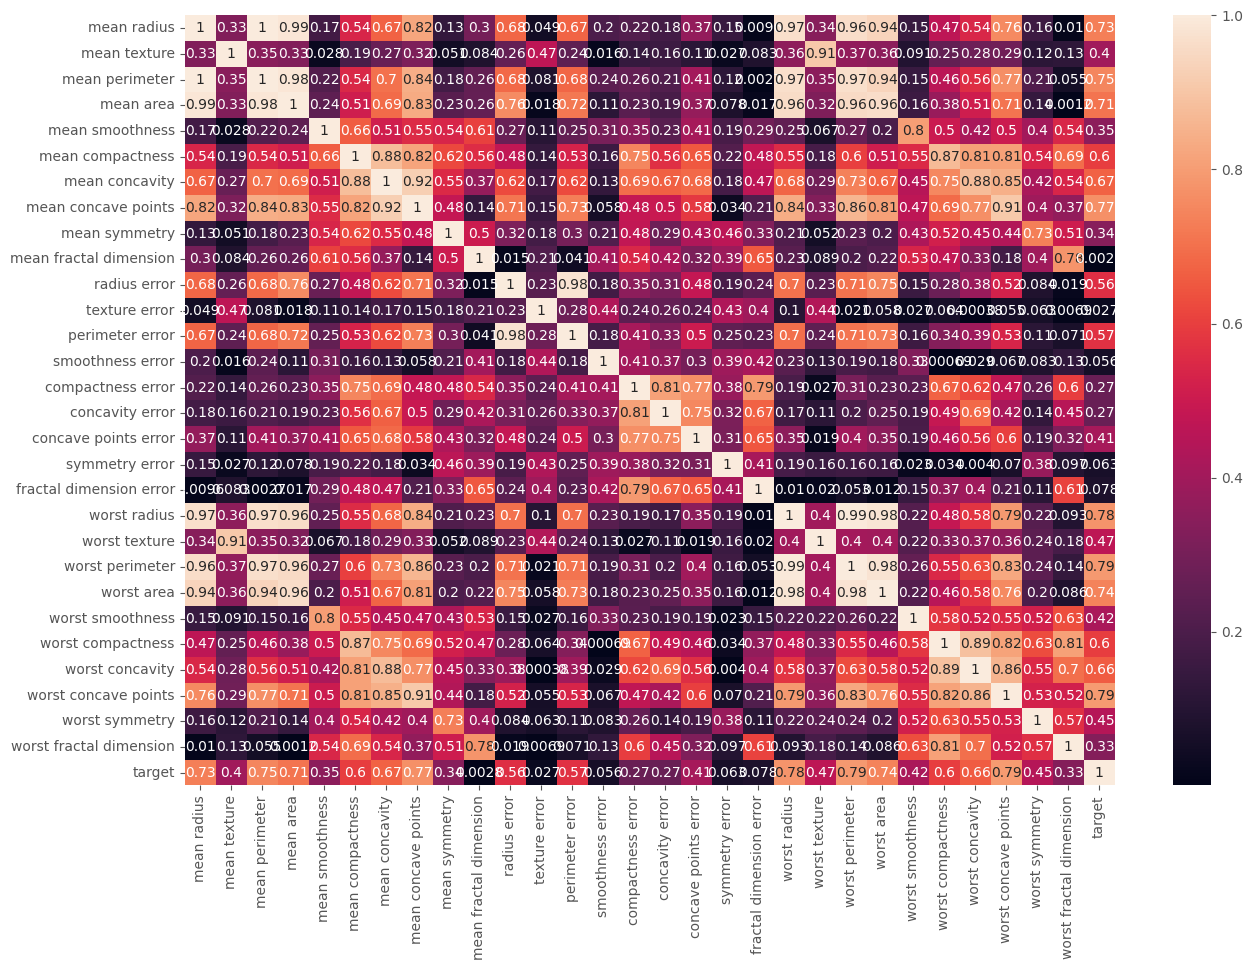

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(df.select_dtypes(include='number').corr().abs(), annot= True)


<Axes: xlabel='mean radius', ylabel='Count'>

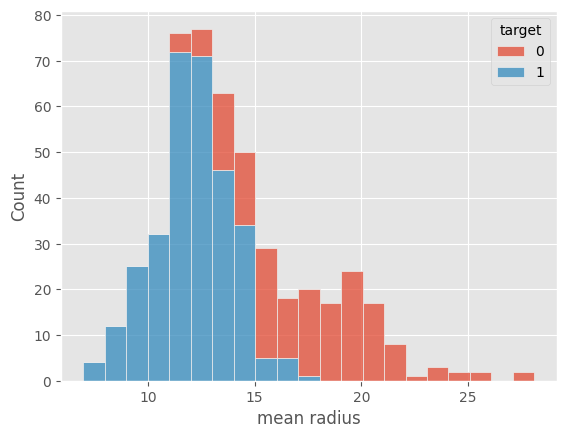

In [14]:
sns.histplot(df, x="mean radius", hue = 'target', multiple='stack')

In [15]:
report=sweetviz.analyze(df, target_feat="target")

In [16]:
#report.show_html(layout='vertical')

In [17]:
report.show_notebook()

In [22]:
##from pydantic_settings import BaseSettings
#from pandas_profiling import ProfileReport
#report1= ProfileReport(df.iloc[:, 0:5])
df.iloc[:, 0:5]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness
0,NaN,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,NaN
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,NaN,NaN,NaN
...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100
565,NaN,28.25,131.20,1261.0,0.09780
566,16.60,28.08,108.30,NaN,0.08455
567,20.60,29.33,140.10,1265.0,0.11780
